## Analyzing stocks and returns of various stocks compared to benchmarks

### Importing Libraries

In [9]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from pandas.tseries import offsets

In [14]:
yf.pdr_override()
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

### Using yahoo finance to fetch data

In [15]:
nifty = pdr.get_data_yahoo('^NSEI',start,end)
sensex = pdr.get_data_yahoo('^BSESN',start,end)
tata = pdr.get_data_yahoo('TCS.NS',start,end)
aspaint = pdr.get_data_yahoo('ASIANPAINT.NS',start,end)
pfizer = pdr.get_data_yahoo('PFIZER.NS',start,end)
sail = pdr.get_data_yahoo('sail.NS',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Creating dataframe of closing price and removing null values

In [16]:
df=pd.DataFrame()
df["NIFTY"]=nifty.Close
df["SENSEX"] = sensex.Close
df["TCS"]=tata.Close
df["SAIL"]=sail.Close
df["ASIANPAINT"] = aspaint.Close
df["PFIZER"] = pfizer.Close

In [17]:
df1 = df.fillna(method="ffill")
df1 = df1.fillna(method="bfill")
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1976 entries, 2015-01-02 to 2023-01-11
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NIFTY       1976 non-null   float64
 1   SENSEX      1976 non-null   float64
 2   TCS         1976 non-null   float64
 3   SAIL        1976 non-null   float64
 4   ASIANPAINT  1976 non-null   float64
 5   PFIZER      1976 non-null   float64
dtypes: float64(6)
memory usage: 108.1 KB


### Fetching only yearly data and removing days which occured on holidays

In [22]:
year = 2015
dates = df1.index[0]
df2 = pd.DataFrame()
while dates < pd.Timestamp("2023-01-10"):
    if(dates in df1.index):
        print(df1.loc[pd.to_datetime(dates.date())])
        df2[dates] = df1.loc[pd.to_datetime(dates.date())]
    else:
        ndate = dates
        while(not(ndate in df1.index)):
            ndate = ndate + pd.DateOffset(days=1)
        print(df1.loc[pd.to_datetime(ndate.date())])
        df2[ndate] = df1.loc[pd.to_datetime(ndate.date())]
    dates = dates + pd.DateOffset(years=1)

NIFTY          8395.450195
SENSEX        27887.900391
TCS            1289.724976
SAIL             82.849998
ASIANPAINT      775.049988
PFIZER         2220.199951
Name: 2015-01-02 00:00:00, dtype: float64
NIFTY          7791.299805
SENSEX        25623.349609
TCS            1184.800049
SAIL             47.900002
ASIANPAINT      880.799988
PFIZER         2367.449951
Name: 2016-01-04 00:00:00, dtype: float64
NIFTY          8179.500000
SENSEX        26595.449219
TCS            1180.675049
SAIL             50.500000
ASIANPAINT      904.650024
PFIZER         1828.199951
Name: 2017-01-02 00:00:00, dtype: float64
NIFTY         10442.200195
SENSEX        33812.261719
TCS            1315.599976
SAIL             91.849998
ASIANPAINT     1142.750000
PFIZER         2049.500000
Name: 2018-01-02 00:00:00, dtype: float64
NIFTY         10792.500000
SENSEX        35891.519531
TCS            1923.300049
SAIL             54.000000
ASIANPAINT     1383.300049
PFIZER         2819.949951
Name: 2019-01-02 00:00

In [23]:
df2 = df2.transpose()
df2

,NIFTY,SENSEX,TCS,SAIL,ASIANPAINT,PFIZER
2015-01-02,8395.450195,27887.900391,1289.724976,82.849998,775.049988,2220.199951
2016-01-04,7791.299805,25623.349609,1184.800049,47.900002,880.799988,2367.449951
2017-01-02,8179.500000,26595.449219,1180.675049,50.500000,904.650024,1828.199951
2018-01-02,10442.200195,33812.261719,1315.599976,91.849998,1142.750000,2049.500000
2019-01-02,10792.500000,35891.519531,1923.300049,54.000000,1383.300049,2819.949951
2020-01-02,12282.200195,41626.640625,2157.649902,47.250000,1790.650024,4227.500000
2021-01-04,14132.900391,48176.800781,3039.449951,79.300003,2753.699951,5225.299805
2022-01-03,17625.699219,59183.218750,3817.750000,110.099998,3422.399902,5100.600098
2023-01-02,18197.449219,61167.789062,3261.449951,88.949997,3047.250000,4406.950195


In [24]:
df2['tcs_lagged'] = df2['TCS'].shift(1)
df2['sail_lag'] = df2['SAIL'].shift(1)
df2['nifty_lag'] = df2['NIFTY'].shift(1)
df2['sensex_lag'] = df2['SENSEX'].shift(1)
df2['aspaint_lag'] = df2['ASIANPAINT'].shift(1)
df2['pfizer_lag'] = df2['PFIZER'].shift(1)

In [25]:
df2 = df2[["TCS","tcs_lagged","SAIL","sail_lag","NIFTY","nifty_lag","SENSEX","sensex_lag","ASIANPAINT","aspaint_lag","PFIZER","pfizer_lag"]]

In [26]:
df2

,TCS,tcs_lagged,SAIL,sail_lag,NIFTY,nifty_lag,SENSEX,sensex_lag,ASIANPAINT,aspaint_lag,PFIZER,pfizer_lag
2015-01-02,1289.724976,NaN,82.849998,NaN,8395.450195,NaN,27887.900391,NaN,775.049988,NaN,2220.199951,NaN
2016-01-04,1184.800049,1289.724976,47.900002,82.849998,7791.299805,8395.450195,25623.349609,27887.900391,880.799988,775.049988,2367.449951,2220.199951
2017-01-02,1180.675049,1184.800049,50.500000,47.900002,8179.500000,7791.299805,26595.449219,25623.349609,904.650024,880.799988,1828.199951,2367.449951
2018-01-02,1315.599976,1180.675049,91.849998,50.500000,10442.200195,8179.500000,33812.261719,26595.449219,1142.750000,904.650024,2049.500000,1828.199951
2019-01-02,1923.300049,1315.599976,54.000000,91.849998,10792.500000,10442.200195,35891.519531,33812.261719,1383.300049,1142.750000,2819.949951,2049.500000
2020-01-02,2157.649902,1923.300049,47.250000,54.000000,12282.200195,10792.500000,41626.640625,35891.519531,1790.650024,1383.300049,4227.500000,2819.949951
2021-01-04,3039.449951,2157.649902,79.300003,47.250000,14132.900391,12282.200195,48176.800781,41626.640625,2753.699951,1790.650024,5225.299805,4227.500000
2022-01-03,3817.750000,3039.449951,110.099998,79.300003,17625.699219,14132.900391,59183.218750,48176.800781,3422.399902,2753.699951,5100.600098,5225.299805
2023-01-02,3261.449951,3817.750000,88.949997,110.099998,18197.449219,17625.699219,61167.789062,59183.218750,3047.250000,3422.399902,4406.950195,5100.600098


In [28]:
df3 = df2.round(2)

In [29]:
i=0
df4 = pd.DataFrame()
while i<12:
    df4[df3.columns[i]+'_rtn'] = (df3[df3.columns[i]]-df3[df3.columns[i+1]])*100/df3[df3.columns[i]]
    i=i+2

In [34]:
df5=df2
df4 = df4.drop('2015-01-02')

### Visualization of stocks performance of TCS and NIFTY50

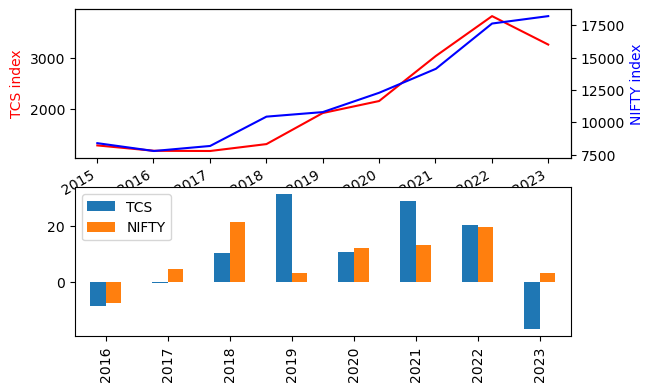

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = ax1.twinx()
df5["TCS"].plot(ax=ax1,c='r')
df5["NIFTY"].plot(ax=ax2,c='b')
ax1.set_xlabel('Years')
ax1.set_ylabel('TCS index',c='r')
ax2.set_ylabel('NIFTY index',c='b')
ax3 = fig.add_subplot(212)
yr = df4.index.year
ndf = pd.DataFrame({'TCS':df4['TCS_rtn'].values,'NIFTY':df4['NIFTY_rtn'].values},index = yr)
ndf.plot.bar(ax=ax3)
plt.show()

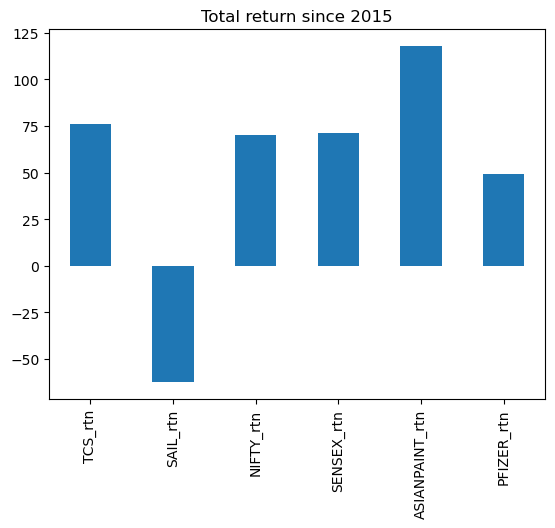

In [42]:
df4.sum().plot.bar()
plt.title("Total return since 2015")
plt.show()

### Correlation between benchmark and other stocks

In [45]:
df.corr()

,NIFTY,SENSEX,TCS,SAIL,ASIANPAINT,PFIZER
NIFTY,1.000000,0.998974,0.958056,0.663986,0.967398,0.807856
SENSEX,0.998974,1.000000,0.965990,0.641987,0.971402,0.827463
TCS,0.958056,0.965990,1.000000,0.578031,0.965708,0.902302
SAIL,0.663986,0.641987,0.578031,1.000000,0.586744,0.406145
ASIANPAINT,0.967398,0.971402,0.965708,0.586744,1.000000,0.873171
PFIZER,0.807856,0.827463,0.902302,0.406145,0.873171,1.000000
